<a href="https://www.kaggle.com/code/emanoelcarvalholopes/uci-lr-students-performance-prediction?scriptVersionId=216894136" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Apresentação

Este notebook visa elaborar um modelo de predição da nota final dos estudantes utilizando modelos de classificação. O trabalho norteador deste é o artigo intitulado [Mineração de dados educacionais com aprendizagem de máquina][1], autoria de Vanessa Faria de Souza, no qual utiliza um conjunto de dados disponível em [UCI Machine Learning Repository][2], de autoria de Paulo Cortez e Alice Silva, que publicaram o artigo [USING DATA MINING TO PREDICT SECONDARY SCHOOL STUDENT PERFORMANCE][3]. Este mesmo _dataset_ foi utilizado por Ali (2023), um dos estudos selecionados na revisão sistemática de literatura, que será um capítulo da minha dissertação de mestrado.

Alguns dos algoritmos de AM para classificação mais conhecidos são: Naïve Bayes; Árvores de Decisão, Random Forest (RF) e Suport Vector Machines (SVM). (Faria de Souza, 2021). Segundo Tan (2009), os modelos de classificação podem ser úteis para prever ou descrever conjunto de dados com categorias nominais ou binárias.


Consultando o Géron, capítulo 2, os seguintes passos são apresentados:

1. Olhar para o quadro geral;
2. Obter os dados;
3. Descobrir e visualizar os dados para obter informações;
4. Preparar os dados para os algoritmos do Aprendizado de Máquina;
5. Selecionar e treinar um modelo;
6. Ajustar o modelo;
7. Apresentar a solução.

Os dados serão obtidos por meio da instalação do repositório da UCI, por meio do comando: 

`!pip install ucimlrepo`

Referências

ALI, D. A.; ABORIZKA, M.; DAHROUG, A. Prediction of Student Performance by Using Machine Learning Techniques. 2023. **4th International Conference on Artificial Intelligence, Robotics and Control (AIRC)**. Anais... Em: 2023 4TH INTERNATIONAL CONFERENCE ON ARTIFICIAL INTELLIGENCE, ROBOTICS AND CONTROL (AIRC). Cairo, Egypt: IEEE, 9 maio 2023. Disponível em: <https://ieeexplore.ieee.org/document/10303160/>. Acesso em: 9 set. 2024

FARIA DE SOUZA, V. (2021). Mineração de dados educacionais com aprendizagem de máquina. **Revista Educar Mais**, 5(4), 766–787. https://doi.org/10.15536/reducarmais.5.2021.2417

TAN, Pang-Ning; STEINBACH, Michael; KUMAR, Vipin. **Introdução ao DATAMINING:/** mineração de dados. Rio de Janeiro: Ciência Moderna, 2009. xxi, 900 p. ISBN 978-85-7393-761-9

[1]: https://periodicos.ifsul.edu.br/index.php/educarmais/article/view/2417
[2]: https://archive.ics.uci.edu/dataset/320/student+performance
[3]: http://repositorium.sdum.uminho.pt/bitstream/1822/8024/1/student.pdf

## Sobre o conjunto de dados

Quadro 1 – Atributos da Base de dados

**ID**|**Atributos**|**Descrição**
:-----:|:-----|:-----
1|Escola|Escola do aluno (binário: 'GP' - Gabriel Pereira ou 'MS' - Mousinho da Silveira)
2|Gênero|Gênero do aluno (binário: 'F' - feminino ou 'M' - masculino)
3|Idade|Idade do aluno (numérico: de 15 a 22)
4|Endereço|Tipo de endereço residencial do aluno (binário: 'U' - urbano ou 'R '- rural)
5|Famsize|Tamanho da família (binário:' LE3 '- menor ou igual a 3 ou' GT3 '- maior que 3)
6|Pstatus|Status de coabitação dos pais (binário:' T '- morando junto ou' A '- à parte)
7|Medu|Escolaridade da mãe (numérico: 0 - nenhum, 1 - ensino fundamental (4ª série), 2 - 5ª a 9ª série, 3 - ensino médio ou 4 - ensino superior)
8|Fedu|Escolaridade do pai (numérico: 0 - nenhuma, 1 - ensino primário (4º ano), 2 - 5º ao 9º ano, 3 - ensino secundário ou 4 - ensino superior)
9|Mjob|Trabalho da mãe (nominal: 'professor', 'saúde' relacionado, 'serviços'  civis (por exemplo, administrativo ou policial), 'em\_casa' ou 'outro')
10|Fjob|Trabalho  do  pai  (nominal:  'professor',  'saúde'  relacionado,  civil  'serviços'  (por exemplo, administrativo ou policial), 'em\_ casa' ou 'outro')
11|Razão|Razão  para  escolher  esta  escola  (nominal:  perto  de  'casa',  escola  'reputação', 'curso' preferência ou 'outro')
12|Tutor|Tutor do aluno (nominal: 'mãe', 'pai' ou 'outro' )
13|Tempo     de Viagem|Tempo de viagem de casa para a escola (numérico: 1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. A 1 hora, ou 4 -> 1 hora)
14|Horas       de Estudo|Tempo de estudo semanal (numérico: 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas ou 4 -> 10 horas)
 | | 
15|Reprovações|Número de reprovações anteriores nas aulas (numérico: n se 1 <= n <3, senão 4)
16|Schoolup|Suporte educacional extra (binário: sim ou não)
17|Famsup|Suporte educacional familiar (binário: sim ou não)
18|Pago|Aulas extras pagas dentro da disciplina (matemática ou português) (binário: sim ou não)
19|Atividades|Atividades extracurriculares (binário: sim ou não)
20|Creche|Cursou creche (binário: sim ou não)
21|Superior|Deseja cursar o ensino superior (binário: sim ou não)
22|Internet|Acesso à internet em casa (binário: sim ou não)
23|Romântico|Com um relacionamento romântico (binário: sim ou não)
24|Famrel|Qualidade das relações familiares (numérico: de 1 - muito ruim a 5 - excelente)
25|Tempo Livre|Tempo livre depois da escola (numérico: de 1 - muito baixo a 5 - muito alto)
26|Gooout|Saindo com os amigos (numérico : de 1 - muito baixo a 5 - muito alto)
224|Dalc|Consumo de álcool durante o trabalho (numérico: de 1 - muito baixo a 5 - muito alto)
28|Walc|Consumo de álcool no fim de semana (numérico: de 1 - muito baixo a 5 - muito alto)
29|Saúde|Estado de saúde atual (numérico: de 1 - muito ruim a 5 - muito bom)
30|Faltas|Número de faltas na escola (numérico: de 0 a 93)
32|G1|Nota do primeiro período (numérico: de 0 a 20)
32|G2|Nota do segundo período (numérico: de 0 a 20)
33|G3|Nota final (numérico: de 0 a 20, alvo de saída)

Fonte: Adaptado de Faria de Souza, 2021.
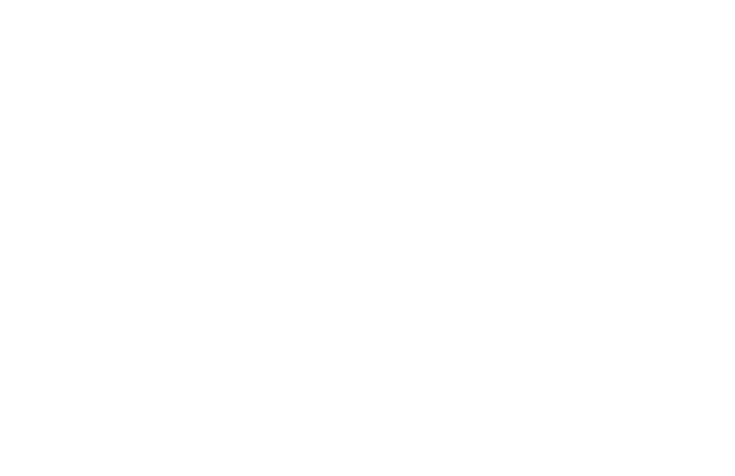
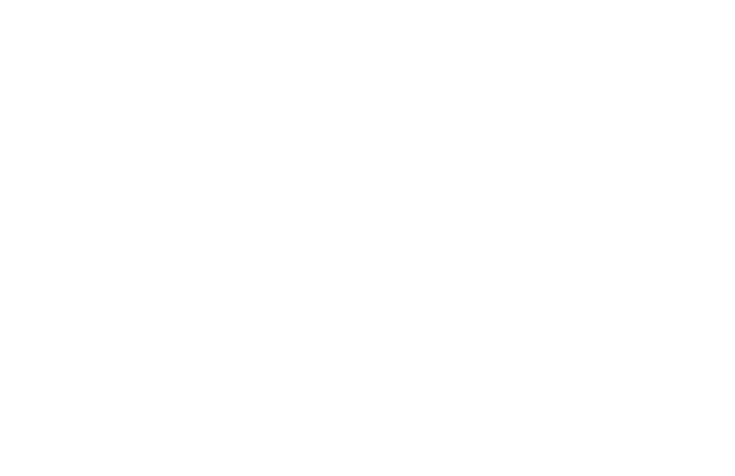
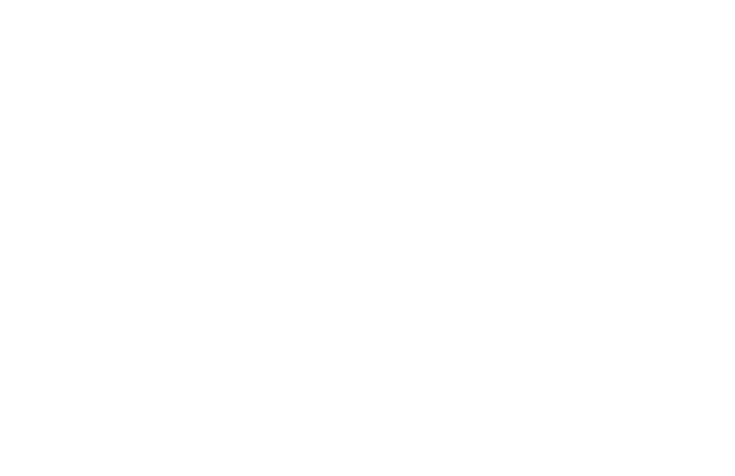

# 0. Importando as bibliotecas necessárias

In [1]:
# importando as bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")


# 2. Obtendo os dados

> “Na primeira etapa os dados foram coletados do repositório de dados público o UCIMachineLearning. Estes dados abordam o desempenho dos alunos no ensino secundário de duas escolas portuguesas.” (Faria De Souza, 2021, p. 773)

In [2]:
# Os dados serão obtidos por meio da instalação do repositório da UCI, por meio do comando:

!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
students = fetch_ucirepo(id=320) 

São retornados, dois conjuntos de dados: features e targets. 30 colunas e 3 colunas, respectivamente.

In [4]:
students.data.features.shape

(649, 30)

In [5]:
students.data.targets.shape

(649, 3)

Comparando a quantidade de linhas com o estudo da Faria de Souza (2021), constata-se uma diferença significativa - apenas 649 ao invés de 1044 como apontado no artigo. 

## 2.1 Junção dos dados

No estudo de Faria de Souza (2021), a primeira providência na preparação dos dados foi unir os conjuntos de dados em um só. O bloco abaixo realizará esta tarefa:

In [6]:
# Junção das duas bases de dados 
# students.data.features + students_data.targets 

students_full = pd.merge(students.data.features,students.data.targets, left_index = True, right_index = True, how = 'inner')

Com o _dataset_ unificado, iremos obter informações.

In [7]:
students_full.shape

(649, 33)

# 3. Visualizar os dados para obter informações

In [8]:
# As cinco primeiras linhas do conjunto de dados unificado.

students_full.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [9]:
# Rápida descrição dos dados com o tipo de cada atributo e o número de valores não nulos.

students_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Note que o _dataset_ possui variáveis/atributos categóricos e numéricos. Portanto, será necessário transformar os dados categóricos antes de treinar qualquer modelo de aprendizagem de máquina, pois estes preferem trabalhar com dados numéricos (Géron, 2019). 

In [10]:
# Podemos visualizar as informações estatísticas dos atributos numéricos.

students_full.describe().T

,count,mean,std,min,25%,50%,75%,max
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0
Dalc,649.0,1.502311,0.924834,1.0,1.0,1.0,2.0,5.0


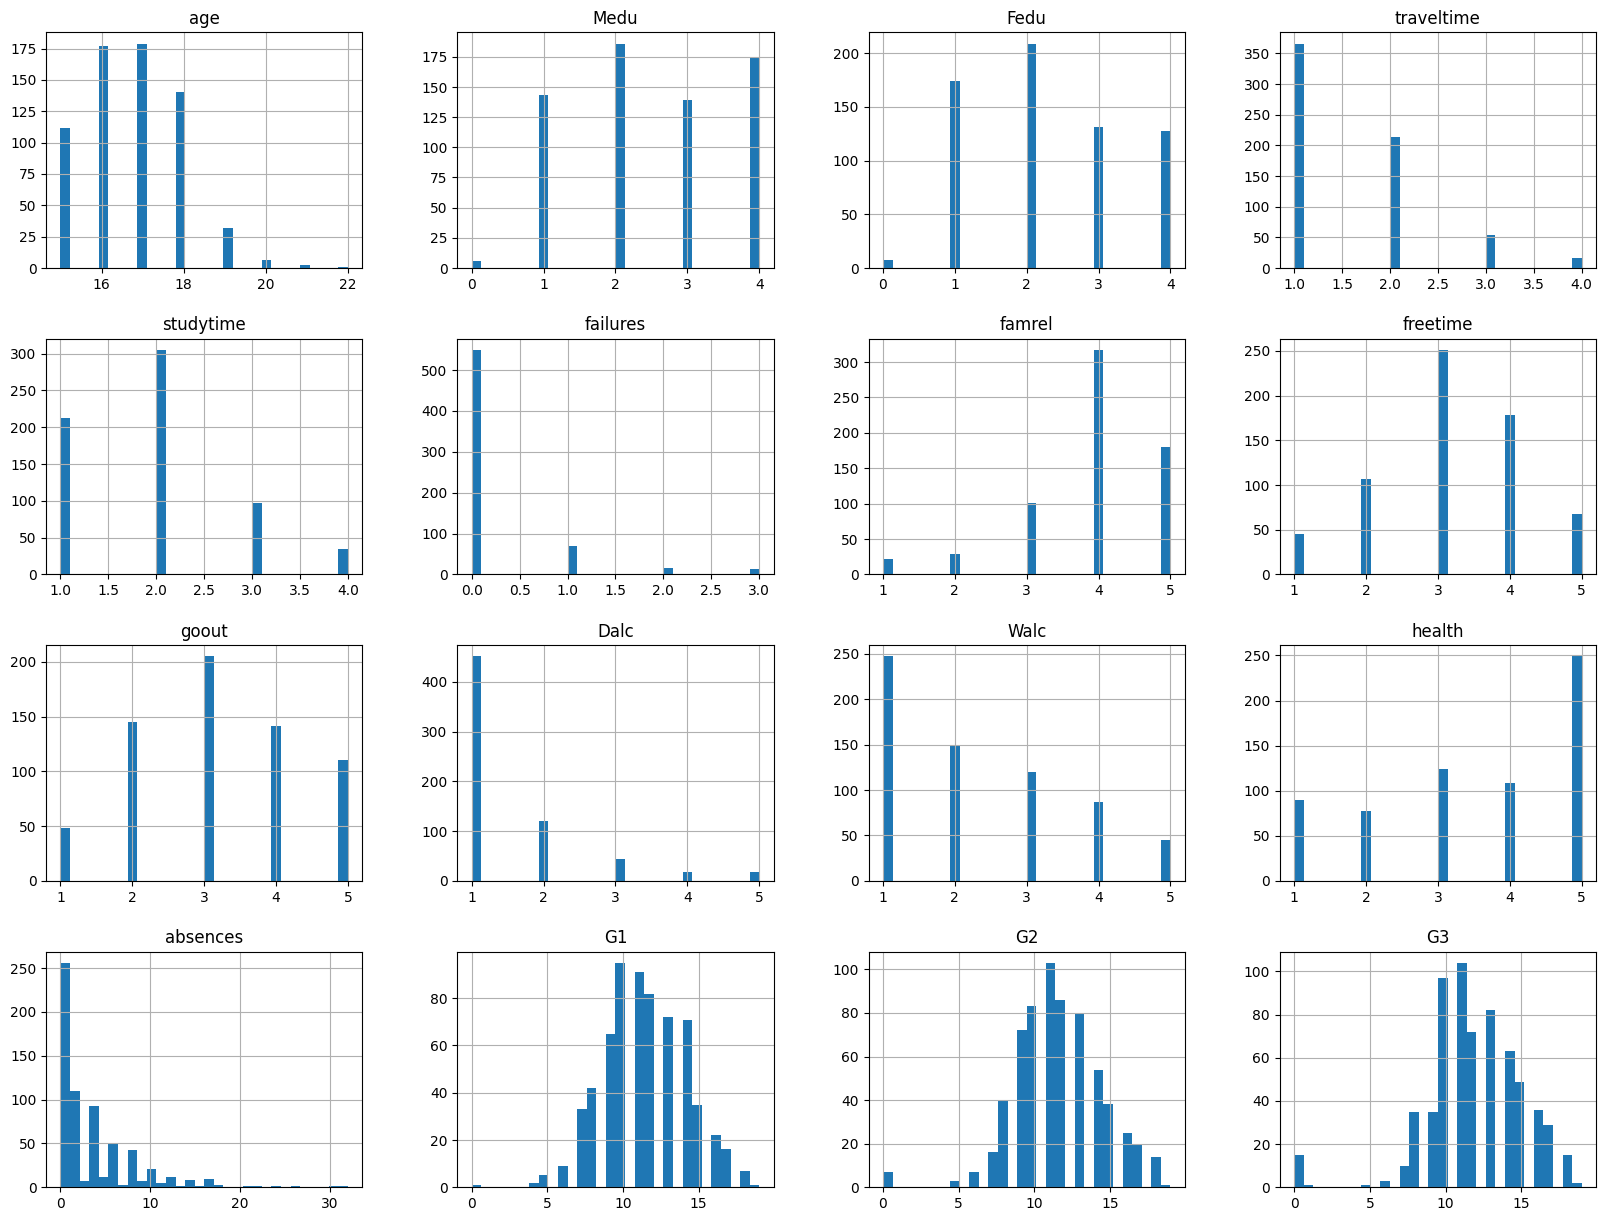

In [11]:
# Um histograma para cada atributo numérico

students_full.hist(bins=30, figsize=(20,15))
plt.show()

Um ponto interessante a observar é que quase 250 estudantes não possuem registros de faltas mas alguns estudantes possuem mais de dez faltas e isso pode provocar um viés na amostragem, levando o algoritmo de aprendizado de máquina aprender que as faltas não possuem correlação com o nota final do estudante. Considerando que Faria de Souza (2021) aponta as faltas como um atributo importante para prever a nota final, assim é importante garantir que o conjunto de testes seja representativo. 


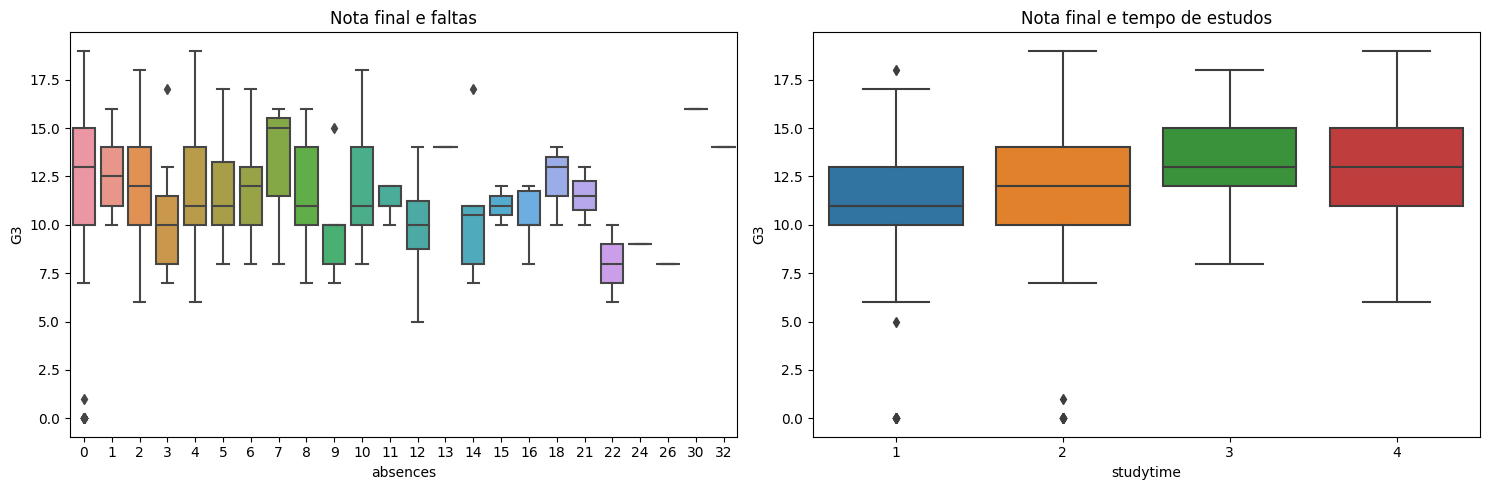

In [12]:
plt.figure(figsize=(15, 5))

# Nota final e faltas
plt.subplot(1, 2, 1)
sns.boxplot(x='absences', y='G3', data=students_full)
plt.title('Nota final e faltas')

# Nota final e tempo de estudos
plt.subplot(1, 2, 2)
sns.boxplot(x='studytime', y='G3', data=students_full)
plt.title('Nota final e tempo de estudos')

plt.tight_layout()
plt.show()

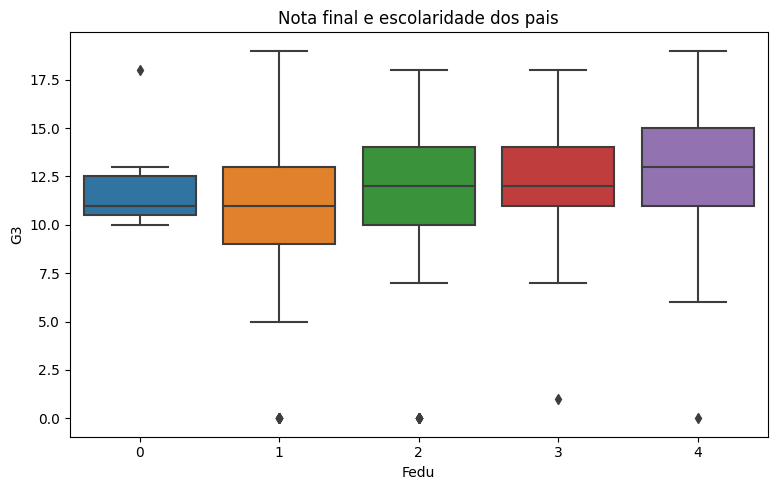

In [13]:
plt.figure(figsize=(15, 5))

# Nota final e escolaridade do pai
plt.subplot(1, 2, 1)
sns.boxplot(x='Fedu', y='G3', data=students_full)
plt.title('Nota final e escolaridade dos pais')


plt.tight_layout()
plt.show()

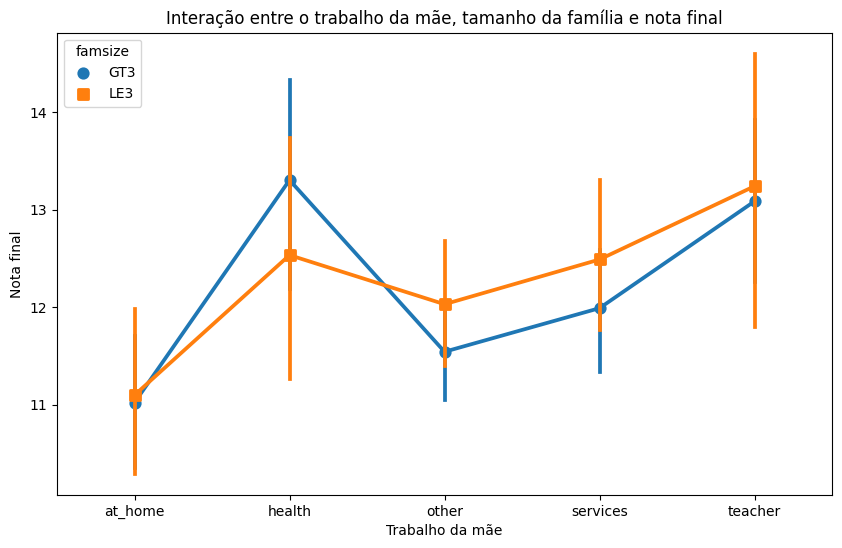

In [14]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='Mjob', y='G3', hue='famsize', data=students_full, 
              dodge=False, markers=["o", "s"], linestyles=["-", "-"])
plt.title('Interação entre o trabalho da mãe, tamanho da família e nota final')
plt.xlabel('Trabalho da mãe')
plt.ylabel('Nota final')
plt.show()

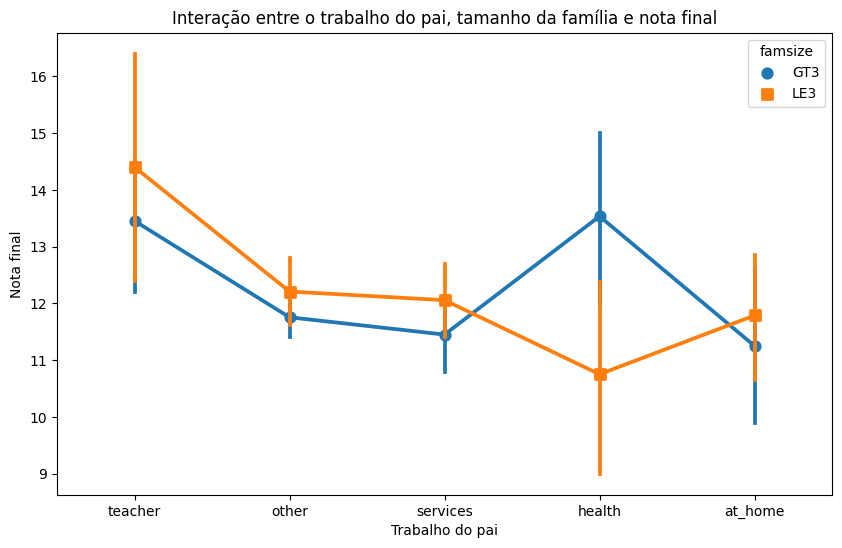

In [15]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='Fjob', y='G3', hue='famsize', data=students_full, 
              dodge=False, markers=["o", "s"], linestyles=["-", "-"])
plt.title('Interação entre o trabalho do pai, tamanho da família e nota final')
plt.xlabel('Trabalho do pai')
plt.ylabel('Nota final')
plt.show()

Famílias onde a mãe atua na área da saúde e o pai é professor, apresentaram notas finais mais elevadas.

Para a maioria dos modelos de regressão do scikit-learn, y_train deve ser um array 1D, mas para modelos com múltiplas saídas (como no caso de MultiOutputRegressor), será necessário um formato 2D.

<Axes: >

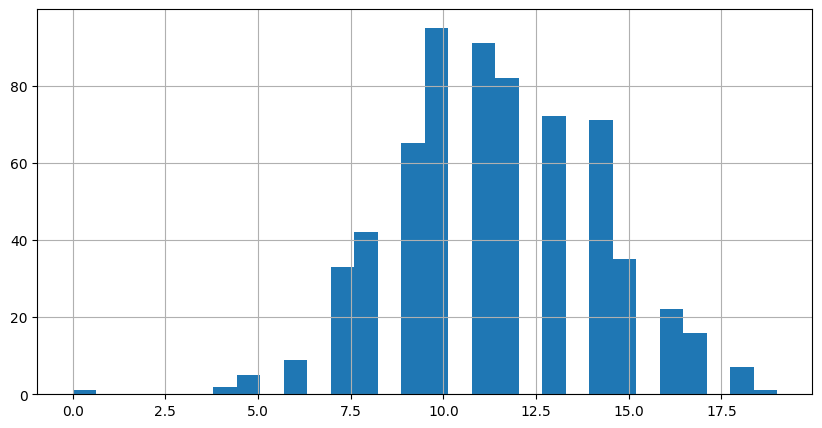

In [16]:
# Distribuição da nota G1

students_full['G1'].hist(bins=30, figsize=(10, 5))

<Axes: >

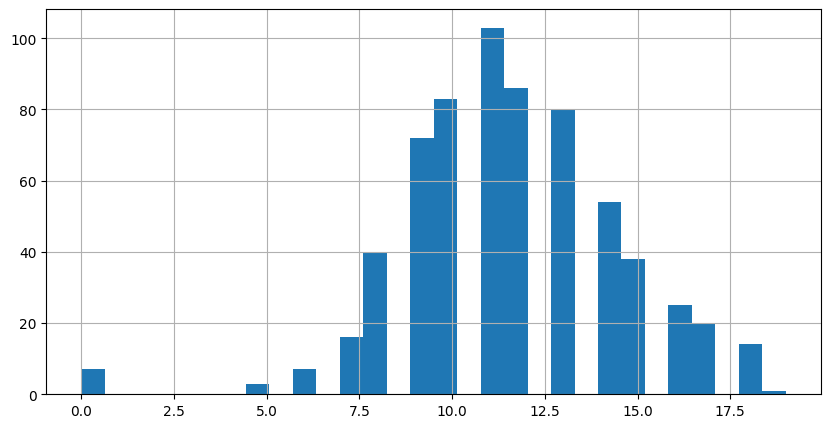

In [17]:
# Distribuição da nota G2 

students_full['G2'].hist(bins=30, figsize=(10, 5))

<Axes: >

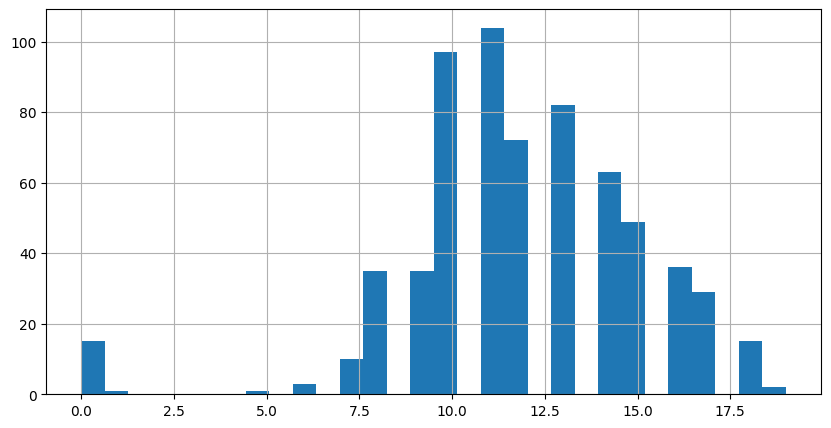

In [18]:
# Distribuição da nota G3

students_full['G3'].hist(bins=30, figsize=(10, 5))

Visualmente, percebe-se uma semelhança entre G1, G2 e G3. 

<Figure size 1000x500 with 0 Axes>

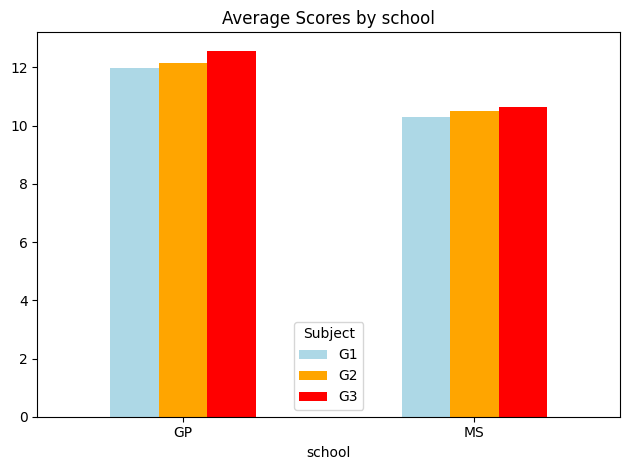

<Figure size 1000x500 with 0 Axes>

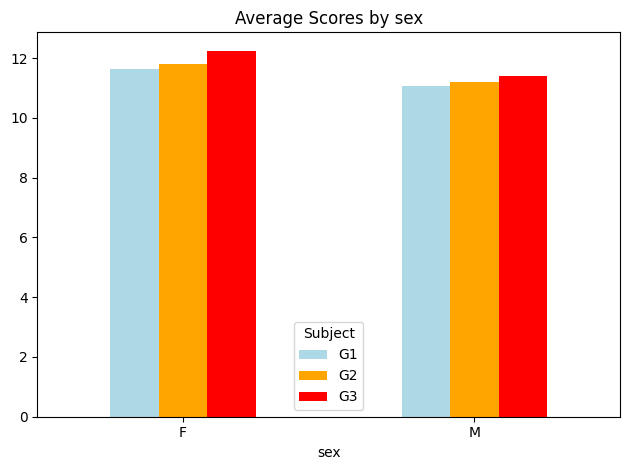

<Figure size 1000x500 with 0 Axes>

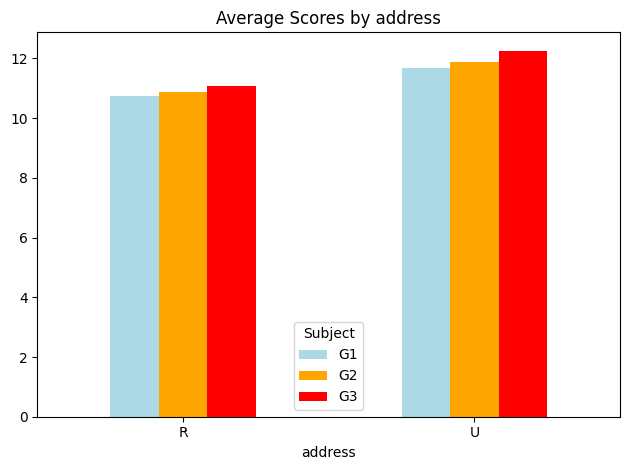

<Figure size 1000x500 with 0 Axes>

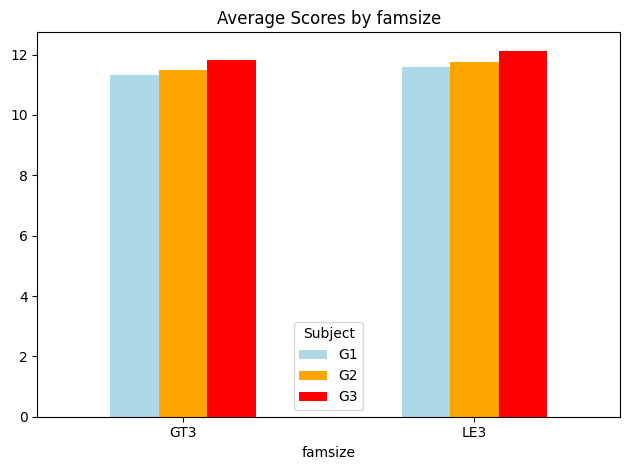

<Figure size 1000x500 with 0 Axes>

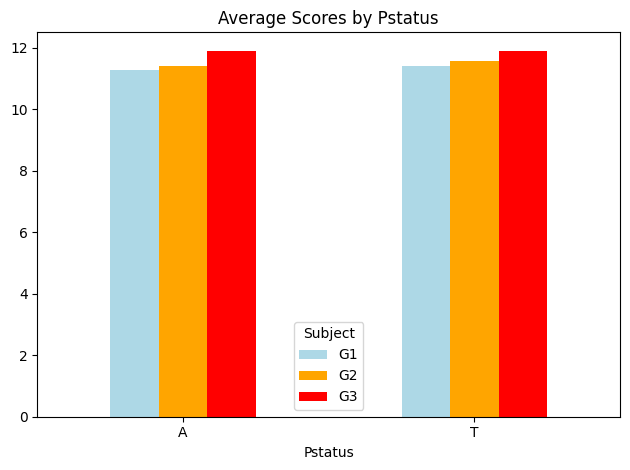

<Figure size 1000x500 with 0 Axes>

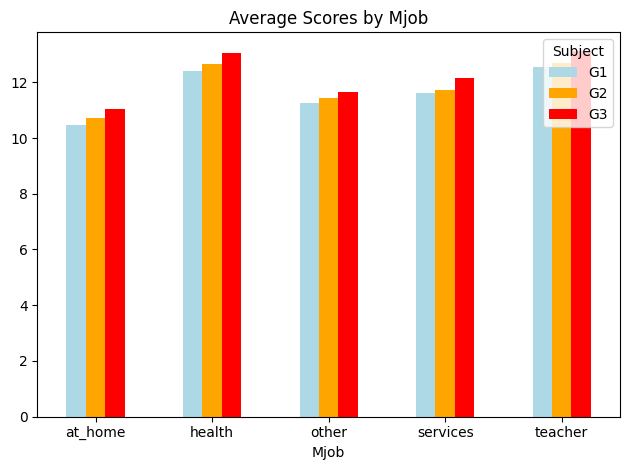

<Figure size 1000x500 with 0 Axes>

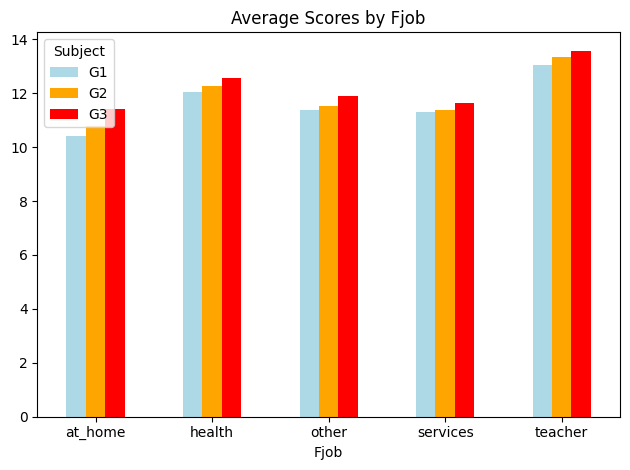

<Figure size 1000x500 with 0 Axes>

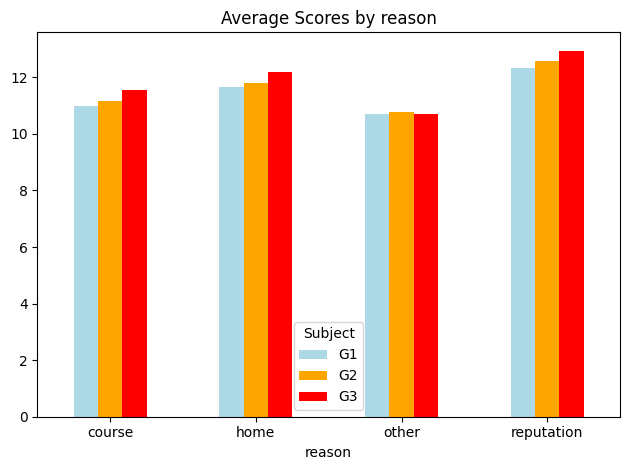

<Figure size 1000x500 with 0 Axes>

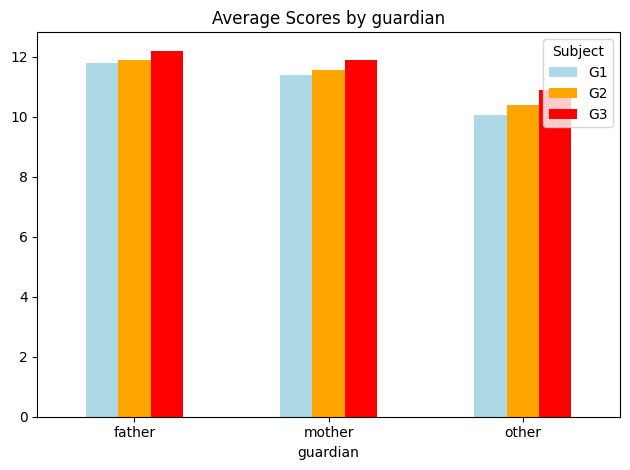

<Figure size 1000x500 with 0 Axes>

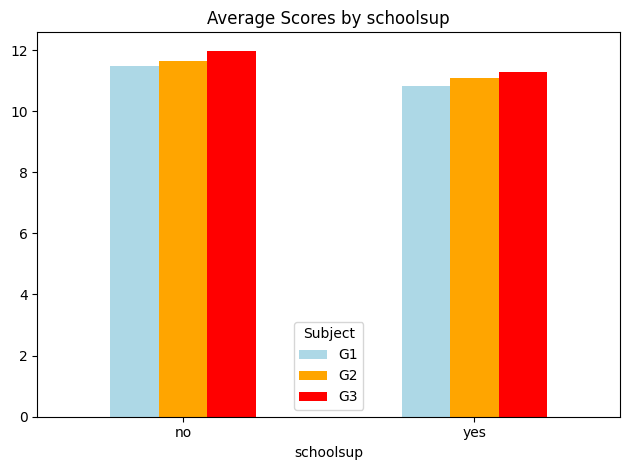

<Figure size 1000x500 with 0 Axes>

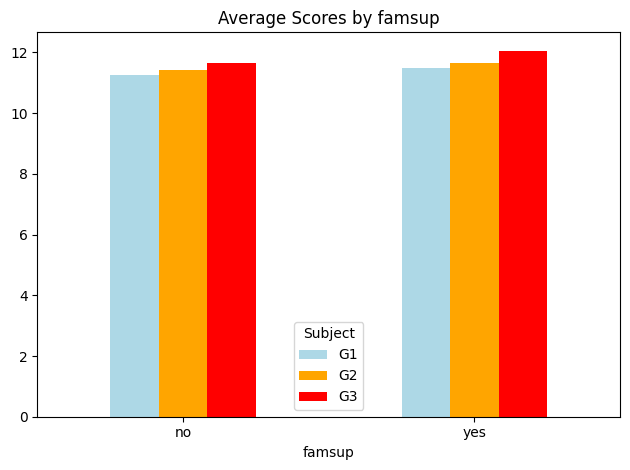

<Figure size 1000x500 with 0 Axes>

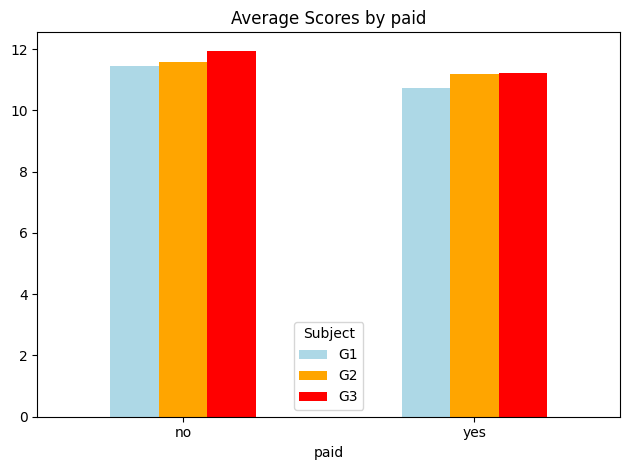

<Figure size 1000x500 with 0 Axes>

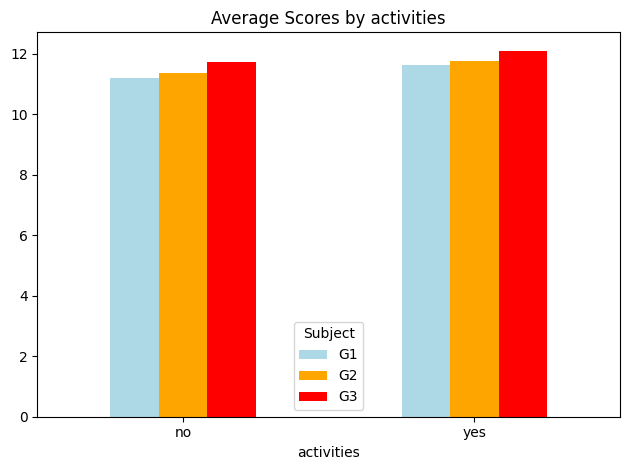

<Figure size 1000x500 with 0 Axes>

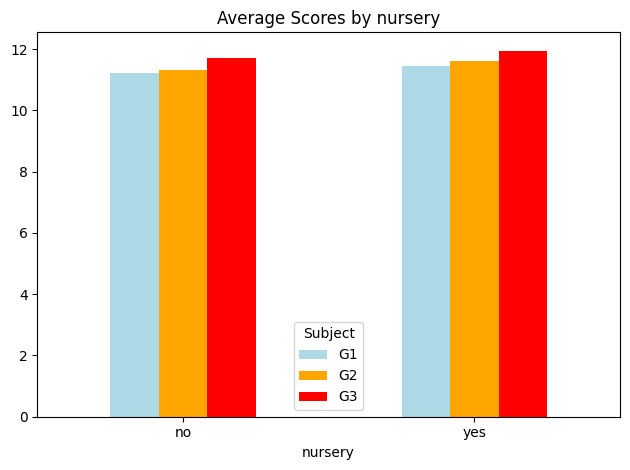

<Figure size 1000x500 with 0 Axes>

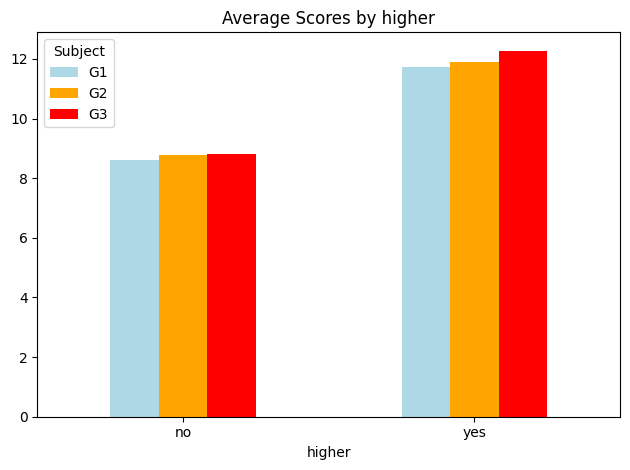

<Figure size 1000x500 with 0 Axes>

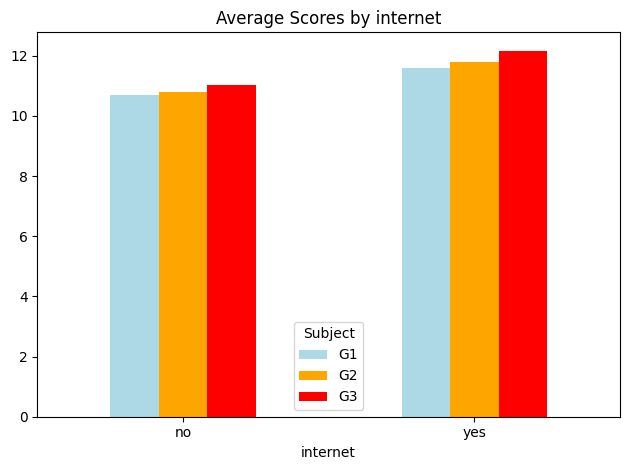

<Figure size 1000x500 with 0 Axes>

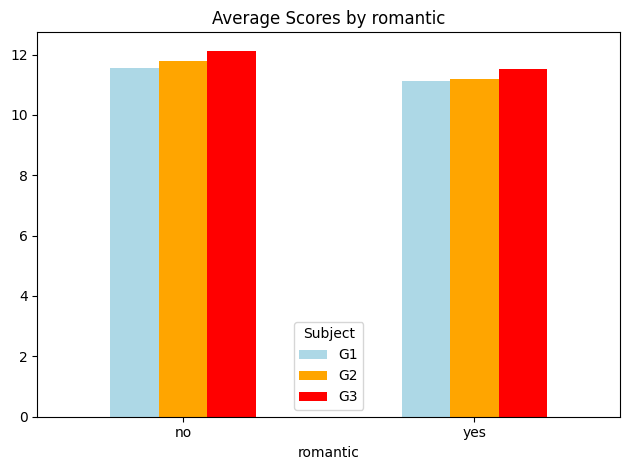

In [19]:
def get_plot_by_feature(feature : str):
    plt.figure(figsize=(10, 5));
    
    feature_mean = students_full.groupby(feature)[['G1', 'G2', 'G3']].mean()
    feature_mean = feature_mean.plot(kind='bar', color=['lightblue', 'orange', 'red'])
    plt.title("Average Scores by " + feature)
    if feature == 'G3':
        plt.xticks(rotation = 45)
    else:
        plt.xticks(rotation=0)
    plt.legend(title = 'Subject')
    plt.tight_layout()
    plt.show()

# Distribuição dos dados categóricos 

categorical_columns = students_full.columns[students_full.dtypes == 'object']
for categorical_column in categorical_columns:
    get_plot_by_feature(categorical_column)

# 4. Preparação dos dados 

Primeiramente, será acrescentada uma nova coluna com níveis de classificação, para a nota final G3, como indicado por Faria de Souza (2021): notas entre 20 e 16 = “A”, notas entre 15 e 11 = “B”, notas entre 10 e 4 = “C”, notas entre 4 e 0 = “D”.

In [20]:
# Função para classificar as notas em faixas: A, B, C e D.
def classificar(nota):
    if 16 <= nota <= 20:
        return 'A'
    elif 11 <= nota <= 15:
        return 'B'
    elif 4 <= nota <= 10:
        return 'C'
    elif 0 <= nota < 4:
        return 'D'

# Aplicando a função
students_full['G3_class'] = students_full['G3'].apply(classificar)

# O conjunto de dados com a nova coluna
students_full.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G3_class
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,B
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,B
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,B
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,B
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,B


O próximo passo é dividir o conjunto de dados em treinamento e testes e separar a classe alvo das variáveis independentes. Para esta tarefa, será utilizada a função `train_test_split` do Scikit-Learn, reservando 20% para teste.

In [21]:
## Modelos de Regressão

label_encoder = LabelEncoder()
for categorical_column in categorical_columns:
    students_full[categorical_column] = label_encoder.fit_transform(students_full[categorical_column])

In [22]:
# Separar a classe alvo das variáveis independentes

y = students_full['G3'].copy()

X = students_full.drop(['G3'], axis=1) 

scaler = StandardScaler()
y = scaler.fit_transform(y)

# Criar as variáveis de treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

ValueError: Expected 2D array, got 1D array instead:
array=[11. 11. 12. 14. 13. 13. 13. 13. 17. 13. 14. 13. 12. 13. 15. 17. 14. 14.
  7. 12. 14. 12. 14. 10. 10. 12. 12. 11. 13. 12. 11. 15. 15. 12. 12. 11.
 14. 13. 12. 12. 10. 11. 15. 10. 11. 11. 13. 17. 13. 12. 13. 16.  9. 12.
 13. 12. 15. 16. 14. 16. 16. 16. 10. 13. 12. 16. 12. 10. 11. 15. 11. 10.
 11. 14. 11. 11. 11. 13. 10. 11. 12.  9. 11. 13. 12. 12. 11. 15. 11. 10.
 11. 13. 12. 14. 12. 13. 11. 12. 13. 13.  8. 16. 12. 10. 16. 10. 10. 14.
 11. 14. 14. 11. 10. 18. 10. 14. 16. 15. 11. 14. 14. 13. 13. 13. 11.  9.
 11. 11. 15. 13. 12.  8. 11. 13. 12. 14. 11. 11. 11. 15. 10. 13. 12. 11.
 11. 10. 10. 14.  9. 11.  9. 13. 11. 13. 11.  6. 12. 10. 11. 13. 11.  8.
 11.  0. 10. 13. 11. 13.  8. 10. 11. 11.  1. 10.  9.  8. 10.  8.  8.  8.
 11. 18. 13. 17. 10. 18. 10. 13. 15. 11. 14. 10. 11. 13. 11. 13. 17. 14.
 16. 14. 11. 16. 14. 10. 13. 12. 12. 10. 12. 16. 14. 12. 16. 11. 15. 12.
 15. 13. 13.  8. 12. 15. 13. 12. 12. 12. 13. 11. 11. 15. 10. 10. 13. 13.
 11. 12. 14. 10. 16.  8. 17. 11. 11. 16. 12. 13. 13. 14.  9. 12. 16. 10.
 13. 10. 10.  7.  8.  9. 15. 10. 11. 13.  8.  8. 10. 15. 14. 15. 12. 15.
 15. 12. 15. 11. 10. 11. 16. 11. 13.  5. 10. 11.  7. 10.  6. 12. 13. 10.
 13. 17. 11. 11. 14. 14. 13. 14. 16. 10. 12. 12. 15. 11. 12. 13. 13.  9.
 16. 14. 12. 14. 10. 12. 16. 13. 18. 15. 16. 12. 10. 12. 13. 15. 10. 10.
 11. 10. 13. 18. 13. 14. 14. 12. 18. 14. 15. 17. 16. 18. 19. 15. 15. 13.
 14. 17. 17. 15. 13.  8. 16. 18. 11. 15. 11. 11. 15. 14. 17. 17. 15. 17.
 14. 10. 13. 14. 17. 17. 13. 14. 11. 11.  9. 10. 13. 10. 17. 15. 14. 13.
 17. 10. 13. 15. 11. 12. 10. 10. 15. 15. 12. 12. 14. 14. 15. 15. 16. 13.
 17. 14. 14. 17. 17. 14. 13. 15. 16. 11. 13. 12. 12. 15. 17. 15. 17. 10.
 15. 11. 18. 17. 14. 11. 17. 10. 13. 11. 12. 10. 11. 17.  9. 11. 11. 10.
  7. 14. 11. 10.  8. 12. 12. 16.  0.  9. 14.  8. 11.  9. 11.  9. 17. 13.
 15. 11. 11.  8.  8.  9. 15. 11. 13. 10. 11. 14. 14. 12. 11.  8. 11. 14.
 13. 13. 12. 12. 16. 10. 11. 14.  8. 11.  8. 10. 10. 11.  9. 11.  8. 11.
 10. 10.  9. 10. 10.  9. 10. 10.  9. 13. 14. 10. 14. 16.  7. 13.  9. 14.
 13. 11. 10. 10.  9. 18. 17. 10.  7.  8.  7. 10. 16. 15.  8.  0.  8. 10.
  8.  6.  8. 16. 14. 10.  9. 11.  9. 10.  8. 16. 12. 10. 14. 12. 11. 10.
 11. 11. 12.  8. 12.  8. 16. 11. 11. 18. 13. 13. 10. 12. 10. 13. 11. 10.
 10. 13. 10. 10. 12.  0. 10.  9.  9.  0.  9.  8.  8.  9.  7. 10. 10. 10.
 11. 11. 10.  9. 10.  8.  7.  0. 11.  8.  0.  8.  9. 10.  7. 14. 13. 14.
 18. 17. 18.  0. 11. 14. 14. 10. 13.  0. 10.  0. 18. 12. 11. 12.  0. 15.
 11. 10. 12. 15. 14. 18. 15. 13. 15. 13.  9. 16.  9. 10.  0. 10. 12.  9.
 17. 12.  9. 14. 16.  9. 19.  0. 16.  0.  0. 15. 11. 10. 10. 16.  9. 10.
 11.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# Modelos de Machine Learning (sem os que esperam arrays 2D)
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
}

# Avaliar cada modelo
results = []
for model_name, model in models.items():
    # Verifique o formato antes de treinar
    print(f'Treinando modelo: {model_name}')
    print(f'y_train shape before fit: {y_train.shape}')
    
    model.fit(X_train, y_train)  # y_train deve ser 1D aqui
    
    y_pred_scaled = model.predict(X_test)
    
    # Verifique o formato de y_pred_scaled
    print(f'y_pred_scaled shape: {y_pred_scaled.shape}')
    
    # Inversão da transformação
    y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))  # Certifique-se que y_pred seja 2D para inversão
    y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))  # Certifique-se que y_test seja 2D para inversão
    
    mse = mean_squared_error(y_test_original, y_pred)
    mae = mean_absolute_error(y_test_original, y_pred)
    r2 = r2_score(y_test_original, y_pred)
    
    results.append({
        "Model": model_name,
        "MSE": mse,
        "MAE": mae,
        "R2": r2
    })

# Criar DataFrame com resultados
results_students_full = pd.DataFrame(results).sort_values(by="R2", ascending=False).reset_index(drop=True)

print(results_students_full)

In [ ]:
# Redes Neurais

X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

input_layer = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(32, activation='relu')(input_layer)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
output_layer = tf.keras.layers.Dense(y_train.shape[1], activation='linear')(x)
model = tf.keras.Model(inputs = input_layer, outputs = output_layer)

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mape'])

model.summary()

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size = 64)

ABORDAGEM ANTIGA ↓↓↓

Com as variáveis necessárias criadas, veremos três abordagens para tratar de dados categóricos: 

1. Remover colunas com dados categóricos;
2. Converter em inteiros seguindo uma ordem (_ordinal enconding_);
3. Criação de um atributo binário para cada atributo (_one-hot enconding_).

Ademais, Géron (2019) apresenta o método `factorize()` da biblioteca pandas, no entanto, não será considerado agora.

O bloco abaixo apresenta uma função para a escolha da abordagem mais apropriada, baseada na métrica _Mean Absolute Error_ (MAE). A abordagem melhor será a que apresentar menor valor.

In [ ]:
# Função para auxiliar na comparação das abordagens
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

## 4.1 Remover colunas com dados categóricos

Nesta abordagem, serão removidas as colunas que apresentam dados categóricos.

In [ ]:
drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_test = X_test.select_dtypes(exclude=['object'])


Validando a abordagem de remoção das colunas que contém dados categóricos.

In [ ]:
# Validando com a métrica MAE
print("MAE:") 
print(score_dataset(drop_X_train, drop_X_test, y_train, y_test))

## 4.2 Ordinal Encoding

Execute o bloco seguinte para transformar os atributos categóricos em números ordinais. 

In [ ]:
# Colunas com atributos categóricos
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# Columns that can be safely ordinal encoded
good_label_cols = [col for col in object_cols if 
                   set(X_test[col]).issubset(set(X_train[col]))]
        
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))

print('Colunas categóricas que serão transformadas:', good_label_cols)
print('\nColunas categóricas que serão removidas do conjunto de dados:', bad_label_cols)

In [ ]:
# Drop categorical columns that will not be encoded
label_X_train = X_train.drop(bad_label_cols, axis=1)
label_X_test = X_test.drop(bad_label_cols, axis=1)

# Apply ordinal encoder 
enc =  OrdinalEncoder()
label_X_train[good_label_cols] = enc.fit_transform(X_train[good_label_cols])
label_X_test[good_label_cols] = enc.transform(X_test[good_label_cols])


In [ ]:
print("MAE para Ordinal Encoding:") 
print(score_dataset(label_X_train, label_X_test, y_train, y_test))

## 4.3 One Hot Enconding

Nesta abordagem, os atributos categóricos serão tratados com a técnica do _one-hot enconding_.

In [ ]:
# todas as colunas, exceto a última: nota final (G3)


one_hot_encoded_training_predictors = pd.get_dummies(object_cols)
oh_enc = OneHotEncoder()

# Selecionar e treinar um modelo

Modelo de classificação do tipo preditivo. 

In [ ]:
# Utilizando o modelo de Regressão Logística

log_reg = LogisticRegression(random_state=42, max_iter=200)
log_reg.fit(X_train, y_train)

In [ ]:
# Predições

y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Acurácia: {accuracy:.2f}")

Observação: este modelo precisa ser aprimorado.

### Utilizando Pipelines

In [ ]:
# Selecionar as colunas com baixa cardinalidade
categorical_cols = [cname for cname in X_train.columns if
                    X_train[cname].nunique() < 10 and 
                    X_train[cname].dtype == "object"]

# Selecionar as colunas numéricas
numerical_cols = [cname for cname in X_train.columns if 
                X_train[cname].dtype in ['int64', 'float64']]

my_cols = categorical_cols + numerical_cols
X_train = X_train[my_cols].copy()
X_test = X_test[my_cols].copy()

# Pré-processamento de dados numéricos

numerical_transformer = SimpleImputer(strategy='constant')

# Pré-processamento de dados categóricos

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Pré-processamento composto de dados categóricos e numéricos 

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Ajustar e transformar os dados de treinamento
X_train_processed = preprocessor.fit_transform(X_train)

# Transformar os dados de teste
X_test_processed = preprocessor.transform(X_test)

# Utilizando o modelo de Regressão Logística

log_reg = LogisticRegression(random_state=42, max_iter=200)
log_reg.fit(X_train_processed, y_train)

# 1. Realizar previsões
y_pred = log_reg.predict(X_test_processed)

# 2. Avaliar o desempenho
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')

# Relatório de classificação
print(classification_report(y_test, y_pred))

# 3. Confusão de matriz
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Classe 0', 'Classe 1'], 
            yticklabels=['Classe 0', 'Classe 1'])
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
# Utilizando o modelo de Árvore de Decisão

In [ ]:
students_num = students_full.drop('G3', axis=1)